In [2]:
import csv
import numpy as np
import pandas
import sklearn
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
%matplotlib inline 

In [163]:
#Reading the data
training_examples = pandas.read_csv("C:\\Users\\varamase\\Documents\\DataStreams\\M365NCA\\Data\\Features\\Training\\AllFeatures.csv")
# training_labels = training_examples[["CustomerAdd.x"]]
# training_examples = training_examples.drop('CustomerAdd.x', axis=1)
# training_examples = training_examples.drop('CustomerAdd.y', axis=1)
# training_examples = training_examples.drop('ym', axis=1)
# training_examples_tpid = training_examples[["FinalTPID"]]
# training_examples = training_examples.drop('FinalTPID', axis=1)
#training_examples = training_examples.iloc[:,0:200]

In [151]:
print(len(training_examples.columns))
print (training_examples.columns)

336
Index(['FinalTPID', 'CustomerAdd.x', 'ym', 'O365MAU', 'O365MauTrend',
       'O365MauMean', 'EXOMAU', 'EXOMAUTrend', 'EXOMAUMean', 'ODSPMAU',
       ...
       'WindowsDeviceLicensingYr1', 'WindowsDeviceLicensingYr2',
       'AzureYoYChange', 'AzureMean', 'AzureYr1', 'AzureYr2',
       'dynamicsYoYChange', 'dynamicsMean', 'dynamicsYr1', 'dynamicsYr2'],
      dtype='object', length=336)


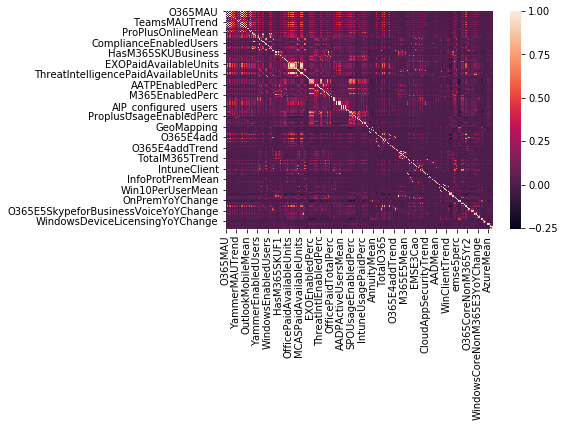

In [110]:
# Check variable correlations #

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

corr = training_examples.corr()
sns.heatmap(corr)

In [113]:
# Remove one of the two variables with correlations > 0.9
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
selected_columns = training_examples.columns[columns]
training_examples = training_examples[selected_columns]

In [115]:
import statsmodels.formula.api as sm
def backwardElimination(x, Y, sl, columns):
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(Y, x).fit()
        maxVar = max(regressor_OLS.pvalues)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
                    columns = np.delete(columns, j)
                    
    regressor_OLS.summary()
    return x, columns
SL = 0.05
data_modeled, selected_columns = backwardElimination(training_examples.iloc[:,:].values, training_labels, SL, selected_columns)

In [166]:
print (selected_columns)
training_examples = pd.DataFrame(data = data_modeled, columns = selected_columns)

Index(['DesktopSubscription', 'IsFastTrackTenant', 'EXOEnabledUsers',
       'AADPP2EnabledUsers', 'AIPP2EnabledUsers', 'IsM365', 'HasM365PaidSeats',
       'HasM365SKUF1', 'HasM365SKUE3', 'HasM365Sku', 'HasWindowsSku',
       'HasOfficeSKUE1', 'HasOfficeSKUE4', 'EMSPaidAvailableUnits',
       'M365PaidAvailableUnits', 'AADPPaidAvailableUnits',
       'AATPPaidAvailableUnits', 'AIPP2PaidAvailableUnits',
       'WindowsPaidAvailableUnits', 'ProPlusEnabledPerc', 'AIPEnabledPerc',
       'IntuneEnabledPerc', 'WindowsEnabledPerc', 'M365EnabledPerc',
       'WindowsPaidTotalPerc', 'Intune_configured_users',
       'Intune_active_users', 'AADPActiveUsersTrend', 'OATPActiveUsersTrend',
       'ProplusUsageEnabledPerc', 'IntuneUsagePaidPerc',
       'IntuneUsageEnabledPerc', 'OATPUsagePaidPerc', 'GeoMapping',
       'IndustryMapping', 'Annuity', 'DarkAnnuity', 'O365E12', 'O365E12add',
       'O365E3', 'O365E3add', 'O365E5', 'TotalO365', 'TotalO365Mean',
       'O365E12Trend', 'O365E12Mean', 'O

In [134]:
# Remove possible leaked variables #

training_examples = training_examples.drop('M365PaidAvailableUnits', axis=1)
training_examples = training_examples.drop('M365E5', axis=1)
training_examples = training_examples.drop('M365F1', axis=1)
training_examples = training_examples.drop('M365E3Mean', axis=1)
training_examples = training_examples.drop('M365F1Trend', axis=1)
training_examples = training_examples.drop('M365F1Mean', axis=1)
training_examples = training_examples.drop('M365EnabledPerc', axis=1)
training_examples = training_examples.drop('M365E3', axis=1)

In [145]:
# Oversampling the positive class - change this to hand written code #

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
X_train, X_test, y_train, y_test = train_test_split(training_examples, training_labels, random_state=2, test_size= 0.2)
ros = RandomOverSampler(random_state=0, ratio = 0.5) # don't want to make it equal, change this to %
X_resampled, y_resampled = ros.fit_sample(X_train, y_train) 

print(X_train.shape)
print(X_resampled.shape)
print(X_test.shape)

y_train1 = list(y_train['CustomerAdd.x'])
count1 = 0
count2 = 0
for i in y_train1:
    if i == 1:
        count1 += 1
    if i == 0:
        count2 += 1
print(count1, count2)
print(y_test['CustomerAdd.x'].value_counts())
count1 = 0
count2 = 0
for i in y_resampled:
    if i == 1:
        count1 += 1
    if i == 0:
        count2 += 1
print(count1, count2)

ValueError: With under-sampling methods, the number of samples in a class should be less or equal to the original number of samples. Originally, there is 768 samples and 5000 samples are asked.

In [164]:
# Oversampling the positive class and undersampling the negative class #
from sklearn.utils import resample
training_examples.rename(columns={'CustomerAdd.x':'CustomerAdd'}, 
                 inplace=True)

not_add = training_examples[training_examples.CustomerAdd == 0]
add = training_examples[training_examples.CustomerAdd == 1]

# upsample minority
add_upsampled = resample(add,
                          replace=True, # sample with replacement
                          n_samples= 5000, # match number in majority class
                          random_state=27) # reproducible results

# downsample majority
not_add_downsampled = resample(not_add,
                                replace = False, # sample without replacement
                                n_samples = 5000, # match minority n
                                random_state = 27) # reproducible results

training_examples = pd.concat([add_upsampled, not_add_downsampled])

X_resampled = training_examples
y_resampled = training_examples[['CustomerAdd']] 
print (X_resampled.shape)
print (y_resampled.shape)

(10000, 336)
(10000, 1)


In [165]:
# Logistic regression, SVM, Random forest #

print (X_resampled.columns)

Index(['FinalTPID', 'CustomerAdd', 'ym', 'O365MAU', 'O365MauTrend',
       'O365MauMean', 'EXOMAU', 'EXOMAUTrend', 'EXOMAUMean', 'ODSPMAU',
       ...
       'WindowsDeviceLicensingYr1', 'WindowsDeviceLicensingYr2',
       'AzureYoYChange', 'AzureMean', 'AzureYr1', 'AzureYr2',
       'dynamicsYoYChange', 'dynamicsMean', 'dynamicsYr1', 'dynamicsYr2'],
      dtype='object', length=336)


In [167]:
# Gradient Boosting Classifier (GBM) - single split (All features)

from sklearn import tree
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import copy

print ("Training Shape:", X_train.shape)
print ("After oversampling:", X_resampled.shape)

model = GradientBoostingClassifier(random_state = 0, max_depth=10)
model.fit(X_resampled, y_resampled)
y_predict = model.predict(X_test)
y_proba = model.predict_proba(X_test)
print ("Accuracy is:", accuracy_score(y_test, y_predict))
print ("Precision:", sklearn.metrics.precision_score(y_test, y_predict))
print ("Recall:", sklearn.metrics.recall_score(y_test, y_predict))

Training Shape: (30792, 64)
After oversampling: (38491, 72)


ValueError: Found input variables with inconsistent numbers of samples: [38491, 10000]

In [ ]:
# # Random forest 

# print ("Training Shape:", X_train.shape)
# print ("After oversampling:", X_resampled.shape)
# model = RandomForestClassifier(n_estimators=1000, max_depth=4,
#                              random_state=0)
# model.fit(X_train,y_train.values.ravel())
# y_predict = model.predict(X_test)
# print (y_predict)
# y_proba = model.predict_proba(X_test)
# print ("Accuracy is:", accuracy_score(y_test, y_predict))
# print ("Precision:", sklearn.metrics.precision_score(y_test, y_predict))
# print ("Recall:", sklearn.metrics.recall_score(y_test, y_predict))

               Predicted Negative  Predicted Positive
True Negative                7407                  76
True Positive                 204                  12
7407 76 204 12


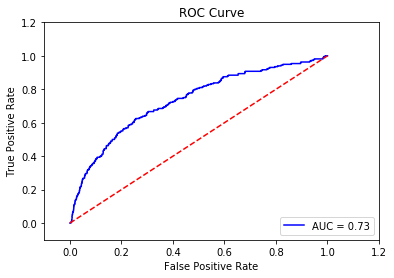

In [141]:
# Gradient Boosting Classifier (GBM) - single split (All features)


#Confusion Matrix
print (pandas.DataFrame(
    confusion_matrix(y_test, y_predict),
    columns=['Predicted Negative', 'Predicted Positive'],
    index=['True Negative', 'True Positive']
))
tn, fp, fn, tp = confusion_matrix(y_test, y_predict).ravel()
print (tn, fp, fn, tp)

#Finding AUC and plotting ROC curve for positive class
y_proba_new = []
for i in y_proba:
    y_proba_new.append(i[1])
y_proba_new = np.array(y_proba_new)

y_test_new = []

#If the lower code does not work, use this
y_test_new = y_test["CustomerAdd.x"]
y_test_new = np.array(y_test_new)

#for i in y_test:
#    y_test_new.append(i[0])
    
#y_test_new = np.array(y_test_new)

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_new, y_proba_new)
roc_auc = auc(false_positive_rate, true_positive_rate)

#Plotting
plt.title('ROC Curve')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
#Feature importance to pick the top features 

features = list(training_examples.columns.values)
importance = model.feature_importances_
feature_importance = []
for i in zip(features, importance):
    feature_importance.append(i)
feature_importance.sort(key=lambda x: x[1], reverse=True)
print ("Feature Importance - ")
print (feature_importance)

# feature_imp_file = open("C:\\Users\\varamase\\Documents\\DataStreams\\NCA\\AugustRefresh\\Modeling\\GBM_FeatureImp_v5.csv","w", newline = '')
# writer = csv.writer(feature_imp_file)
# writer.writerow(["Feature","Importance"])
# for i in feature_importance:
#     row = [i[0], i[1]]
#     writer.writerow(row)
# feature_imp_file.close()        